# Complex models for continuous outcomes. 

In [4]:
cd /Users/dcox/Dropbox/InsightFellowship/Glimpse/

/Users/dcox/Dropbox/InsightFellowship/Glimpse


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.metrics import r2_score

### Read in the data

In [7]:
most_feats = pd.read_csv('most_feats_cont_feateng.csv')

### Set up dfs for predictor and outcome variables 

In [8]:
mostFeats_MathOutc = most_feats['ScantronMathPostTest']
mostFeats_ReadOutc = most_feats['ScantronReadingPostTest']
mostFeats_pred = most_feats.drop(['ScantronMathPostTest', 'ScantronReadingPostTest'], axis=1)

### Recode categorical strings with number labels and save those dictionaries

In [9]:
# Most features df
mostFeats_predCols = list(mostFeats_pred)
mostFeats_predCodes = []
for i in mostFeats_predCols:
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    d = dict(enumerate(mostFeats_pred[i].cat.categories))
    mostFeats_predCodes.append(d)
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    mostFeats_pred[i] = mostFeats_pred[i].cat.codes

In [10]:
# Function we'll use for plotting throughout. 
def line_plot(x):
    '''Returns lineplot of r^2 values for model tested.'''
    plt.plot(r2_vals, marker='o', color='black')
    plt.xlabel('Hyperparam Values Order')
    plt.ylabel('R^2')
    print("Highest R^2:", max(x))

## List of algorithms to try. 
- Ridge Regression
- LASSO Regression
- Elastic Net
- Random Forest
- K-Nearest Neighbors
- Support Vector Regressor

### Import algorithms. 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

### Ridge Regression

R^2: 0.6200240540508455


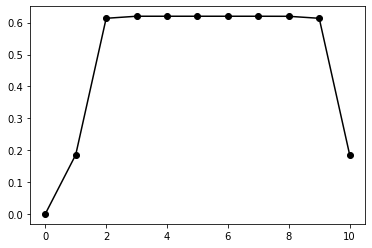

In [12]:
from sklearn.linear_model import Ridge
# Math outcomes
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
rr_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    rr = Ridge(alpha=i)
    rr.fit(X_train, y_train)
    pred_train_rr= rr.predict(X_train)
    pred_test_rr= rr.predict(X_test)
    r_2 = r2_score(y_test, pred_test_rr)
    rr_acc.append(r_2)
plt.plot(rr_acc, marker='o', color='black')
print("R^2:", max(rr_acc))

R^2: 0.7845788275360727


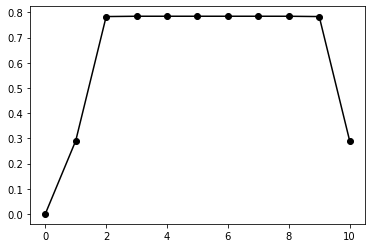

In [13]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
rr_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    rr = Ridge(alpha=i)
    rr.fit(X_train, y_train)
    pred_train_rr= rr.predict(X_train)
    pred_test_rr= rr.predict(X_test)
    r_2 = r2_score(y_test, pred_test_rr)
    rr_acc.append(r_2)
plt.plot(rr_acc, marker='o', color='black')
print("R^2:", max(rr_acc))

### LASSO Regression

/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 611001412.3893381, tolerance: 322546.6428143346
  positive)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 610705009.965975, tolerance: 322546.6428143346
  positive)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 607349130.9385158, tolerance: 322546.6428143346
  positive)


R^2: 0.6201085792755316


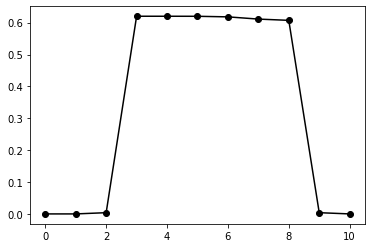

In [14]:
from sklearn.linear_model import Lasso
# Math Outcomes
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
lasso_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    model_lasso = Lasso(alpha=i)
    model_lasso.fit(X_train, y_train) 
    pred_train_lasso= model_lasso.predict(X_train)
    pred_test_lasso= model_lasso.predict(X_test)
    r_2 = r2_score(y_test, pred_test_lasso)
    lasso_acc.append(r_2)
plt.plot(lasso_acc, marker='o', color='black')
print("R^2:", max(lasso_acc))

/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 805708392.3675103, tolerance: 746227.3077496735
  positive)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 805575987.2074426, tolerance: 746227.3077496735
  positive)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 803931442.8449761, tolerance: 746227.3077496735
  positive)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number 

R^2: 0.7846615931457385


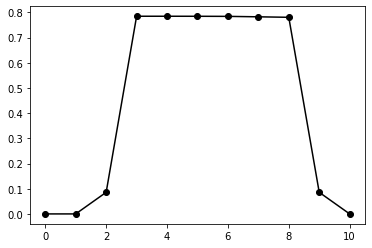

In [15]:
# Reading Outcomes
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
lasso_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    model_lasso = Lasso(alpha=i)
    model_lasso.fit(X_train, y_train) 
    pred_train_lasso= model_lasso.predict(X_train)
    pred_test_lasso= model_lasso.predict(X_test)
    r_2 = r2_score(y_test, pred_test_lasso)
    lasso_acc.append(r_2)
plt.plot(lasso_acc, marker='o', color='black')
print("R^2:", max(lasso_acc))

### Elastic Net

/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 611086489.8523812, tolerance: 322546.6428143346
  positive)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 611522073.3764232, tolerance: 322546.6428143346
  positive)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 613668141.8402896, tolerance: 322546.6428143346
  positive)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number 

R^2: 0.6200899861730461


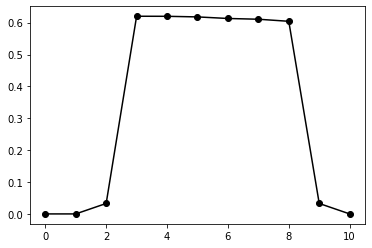

In [16]:
from sklearn.linear_model import ElasticNet
# Math outcomes
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
elst_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    model_enet = ElasticNet(alpha = i)
    model_enet.fit(X_train, y_train) 
    pred_train_enet= model_enet.predict(X_train)
    pred_test_enet= model_enet.predict(X_test)
    r_2 = r2_score(y_test, pred_test_enet)
    elst_acc.append(r_2)
plt.plot(elst_acc, marker='o', color='black')
print("R^2:", max(elst_acc))

/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 805769652.282825, tolerance: 746227.3077496735
  positive)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806105139.5522708, tolerance: 746227.3077496735
  positive)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 807242637.0406864, tolerance: 746227.3077496735
  positive)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number o

R^2: 0.7846542611743141


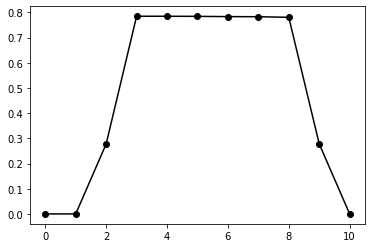

In [17]:
# Reading outcomes
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
elst_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    model_enet = ElasticNet(alpha = i)
    model_enet.fit(X_train, y_train) 
    pred_train_enet= model_enet.predict(X_train)
    pred_test_enet= model_enet.predict(X_test)
    r_2 = r2_score(y_test, pred_test_enet)
    elst_acc.append(r_2)
plt.plot(elst_acc, marker='o', color='black')
print("R^2:", max(elst_acc))

### K-Nearest Neighbor

Highest R^2: 0.7366835246589059


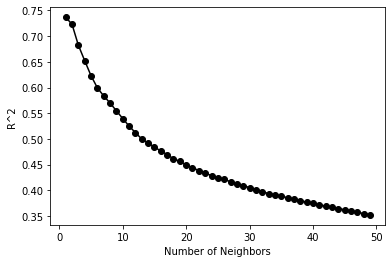

In [18]:
from sklearn.neighbors import KNeighborsRegressor
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
r2_vals = []
neighbors = list(range(1, 50))
for i in neighbors:
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_vals.append(score)
plt.plot(neighbors, r2_vals, marker='o', color='black')
plt.xlabel('Number of Neighbors')
plt.ylabel('R^2')
print("Highest R^2:", max(r2_vals))

Highest R^2: 0.881444084227251


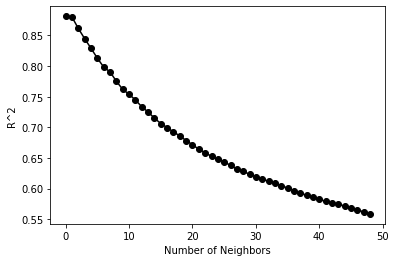

In [19]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
r2_vals = []
neighbors = list(range(1, 50))
for i in neighbors:
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_vals.append(score)
plt.plot(r2_vals, marker='o', color='black')
plt.xlabel('Number of Neighbors')
plt.ylabel('R^2')
print("Highest R^2:", max(r2_vals))

### Support Vector Regression

Highest R^2: -0.006246872859476227


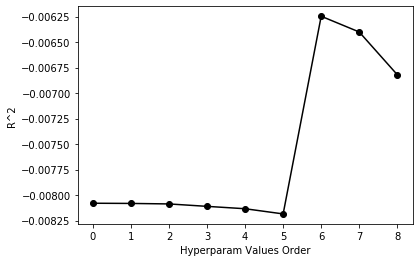

In [20]:
from sklearn.svm import SVR
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
r2_vals = []
gamma_range = [0.01, 0.1, 1]
C_range = [1, 10, 100]
for i in C_range:
    for k in gamma_range:
        svr_rbf = SVR(kernel='rbf', C=i, gamma=k, epsilon=0.01)
        svr_rbf.fit(X_train, y_train)
        y_pred = svr_rbf.predict(X_test)
        score = r2_score(y_test, y_pred)
        r2_vals.append(score)
line_plot(r2_vals)

Highest R^2: -0.03407456314670232


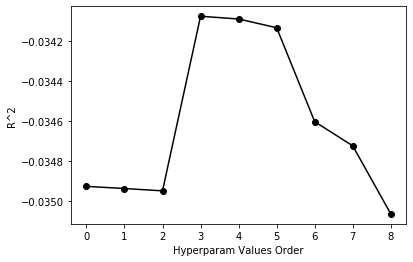

In [21]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
r2_vals = []
gamma_range = [0.01, 0.1, 1]
C_range = [1, 10, 100]
for i in C_range:
    for k in gamma_range:
        svr_rbf = SVR(kernel='rbf', C=i, gamma=k, epsilon=0.01)
        svr_rbf.fit(X_train, y_train)
        y_pred = svr_rbf.predict(X_test)
        score = r2_score(y_test, y_pred)
        r2_vals.append(score)
line_plot(r2_vals)